In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [91]:
#In above Dataframe the Column name Genre is wrong spleed, 
#So first going to rename the Genre with Gender

df.rename(columns={'Genre':'Gender'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [92]:
#Let's See the Column and rows count
df.shape

(200, 5)

In [93]:
#Let's see the Description of the dataset, which helps us to understand the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [94]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [95]:
#Except Gender [categorical] all are descrete values
#Let's see any null values in the data set
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [96]:
#Observed that no null values in the data set

In [97]:
#By observing data set the custemerID Not required to analyse or understand the data
#we can drop the column
df.drop(['CustomerID'], axis=1, inplace=True)

In [98]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

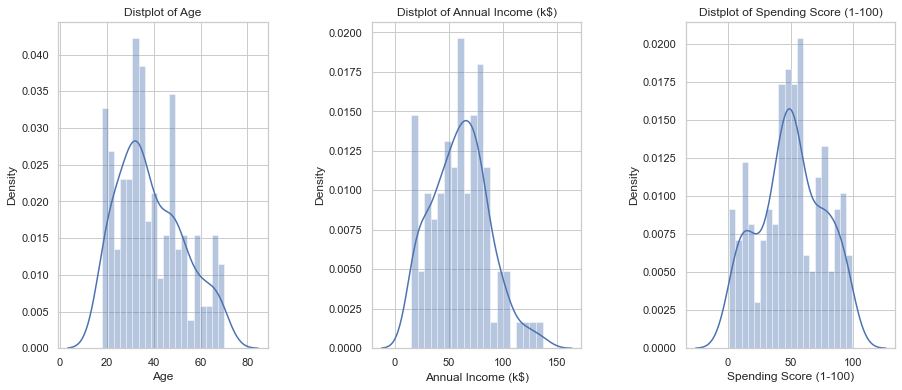

In [99]:
#Now Let's visualize the data
#Create the distplot for the age Gender and Annual Income
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n +=1
    plt.subplot(1, 3, n) # (rows, columns, subplot number)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()


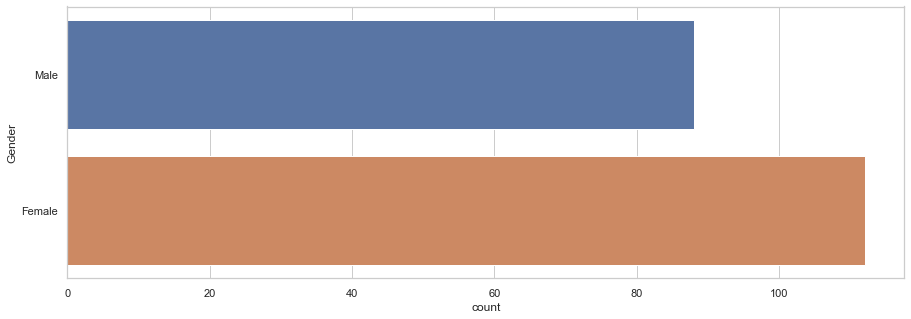

In [100]:
#Above distplots 
#Age 20-30 : has highest density
#Income 50-70 : has highest density
#Most people have Spending score 50

#Let's compare the No.of male and female
#In this case need to draw count plot
plt.figure(figsize=(15,5))
sns.countplot(y='Gender', data=df)
plt.show()


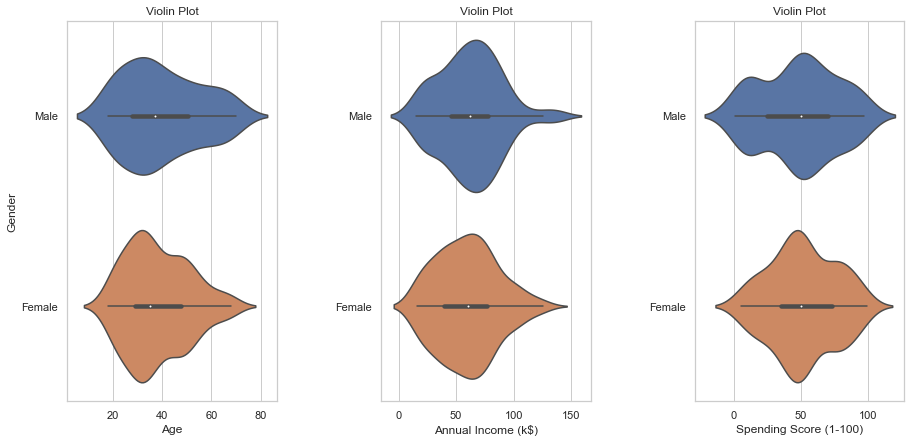

In [101]:
#Above we can see that No. of Female is more than Male
# Same way we re-present the distplot let's re-present the violinplot for 
# Age, annual income, and spending score w.r.t Gender

plt.figure(1, figsize=(15,7))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n +=1
    plt.subplot(1, 3, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y='Gender', data=df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin Plot')
plt.show()

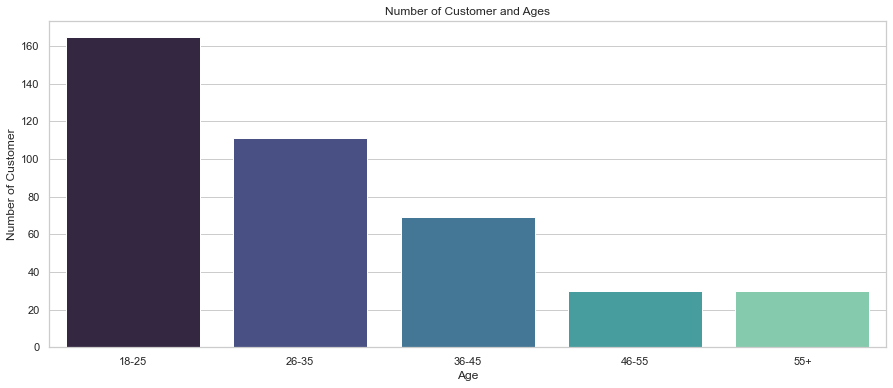

In [102]:
#Observation: 
#Age is having more dencity in Female at Age 30
#Annual Income is having same density at 60 for both male and female
#Spending income is haivng more density in female

#FOr Better visualization and analysis, 
#let's devide the age in to differenet categories to understand which range of age has highest number of customers

#In the describe() we can see that age is starts from 80 and ends with 70

age_18_25 = df.Age[(df.Age >=18) & (df.Age >=25)]
age_26_35 = df.Age[(df.Age >=26) & (df.Age >=35)]
age_36_45 = df.Age[(df.Age >=36) & (df.Age >=45)]
age_46_55 = df.Age[(df.Age >=46) & (df.Age >=55)]
age_55above = df.Age[df.Age >=55]

#In x axis display the names and in y axis display the lengths of the category
agex = ['18-25','26-35','36-45','46-55','55+']
agey = [len(age_18_25), len(age_26_35), len(age_36_45), len(age_46_55), len(age_55above)]

#Plot bar plot to visualize the above readings
plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette='mako')
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


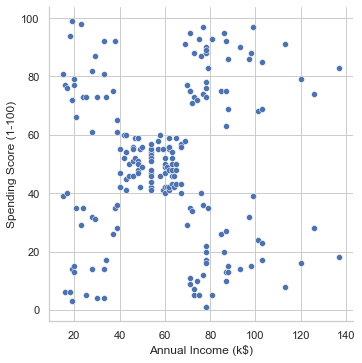

In [103]:
#As we can see that the more number of customers lies b/w 18-25

#Let's find the relationship b/w annual income and selling score
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data =df)


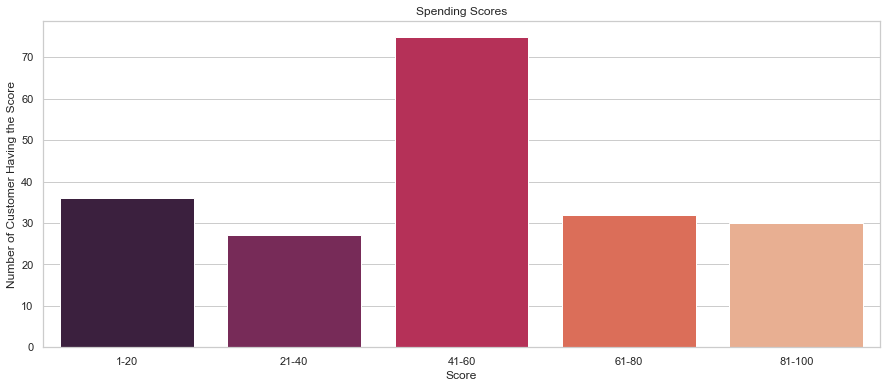

In [104]:
#We can see that not much relation b/w income and selling score
#but we have some relationship b/w annual income b/w 40K to 60K having spending score around 40-60

#Let's devide the spending score into different categories and represent it

ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]


#In x axis display the names and in y axis display the lengths of the category
ssx = ['1-20','21-40','41-60','61-80','81-100']
ssy = [len(ss_1_20), len(ss_21_40), len(ss_41_60), len(ss_61_80), len(ss_81_100)]

#Plot bar plot to visualize the above readings
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette='rocket')
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()


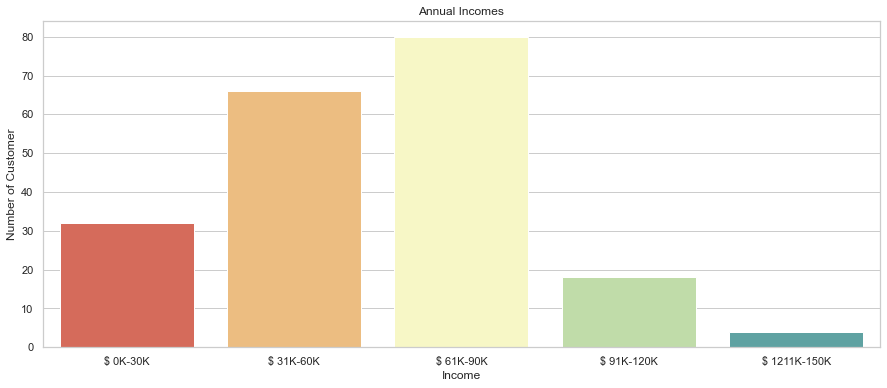

In [105]:
#As above bar plot we can see that max no. of custer having ss is 41-60

#Similar way will check with Annual Income
#Let's devide the Annual Income into different categories and represent it
#As shown in the describe the Annual Income range is 15K$ to 137K$

ai0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
ai31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
ai61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
ai91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]
ai121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <= 150)]


#In x axis display the names and in y axis display the lengths of the category
aix = ['$ 0K-30K','$ 31K-60K','$ 61K-90K','$ 91K-120K','$ 1211K-150K']
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

#Plot bar plot to visualize the above readings
plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette='Spectral')
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


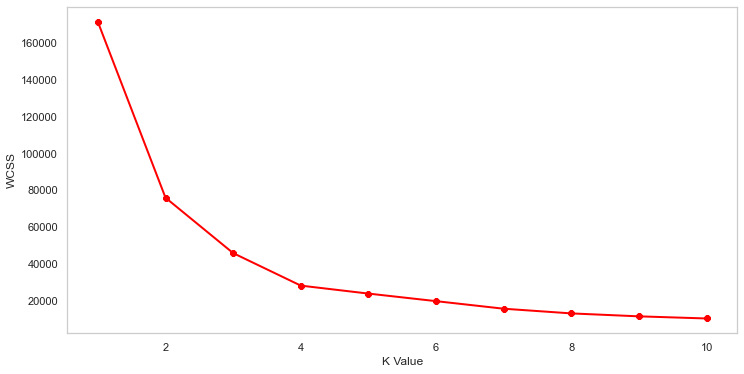

In [106]:
#We can see that most of the customer having income b/w 61-90

#Now we visualized and analysed the data
#Let's start with clustering

#Intially Let's find the relationship b/w age and spending score and cluster the data accordingly

X1 = df.loc[:, ['Age', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans

#Need to understand the optimum no. of cluster we can create
#Find how many clusters are best for clustering based on age and spending score
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()


In [107]:
#As seen above at K value 4 the Curve a little constent
#so at K=4 is optimum

# hear X1 is n.b the Age and spending score values
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)

print(label)

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [108]:
#We can see that the data is devided in to 0,1,2,3,4

#Let's check the centroids
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


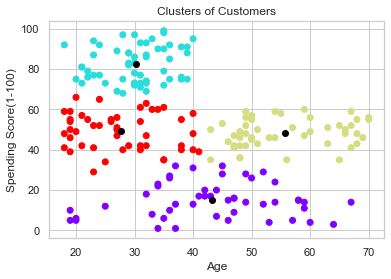

In [109]:
#Let's visualize the clusters on the graph

#all other points are represent in differnt[rainbow] color
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')

#cetroids are represent in black color
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black') 

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


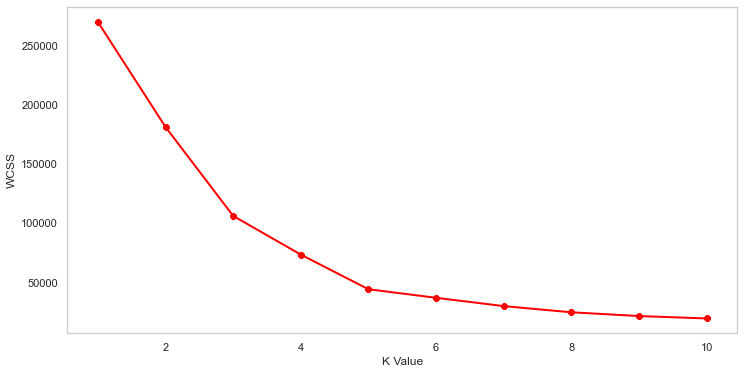

In [110]:
#We can see that four clusters 

#Similary Let's split the data w.r.t Annual Income and Spending Score

# 1. Find the optimum K

X2 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans

#Need to understand the optimum no. of cluster we can create
#Find how many clusters are best for clustering based on age and spending score
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()


In [111]:
#We can see that at 5 the graph is constent so K=5

# 2. convert the data in to 5 clusters
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)

print(label)
print(kmeans.cluster_centers_)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 3 4 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]]


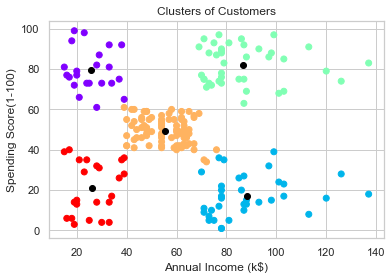

In [112]:
# 3. visualize the clusters on the graph using scatter plot

#all other points are represent in differnt[rainbow] color
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')

#cetroids are represent in black color
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black') 

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


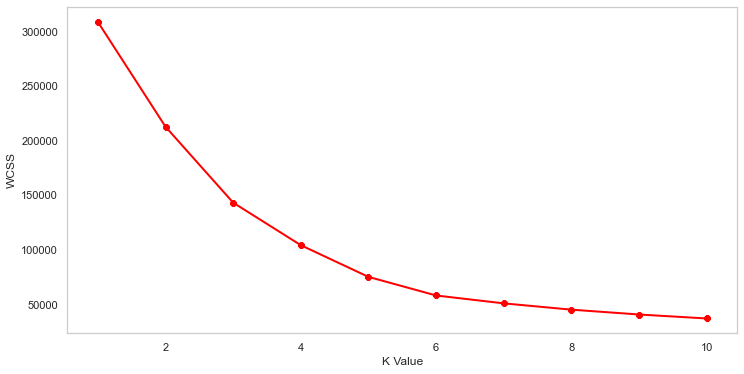

In [113]:
#Now we have clustered the data w.r.t Annual income and spending scrore


#Let's CLuster w.r.t Age, Annual income and Spending score

X3 = df.iloc[:, 1:]

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()



In [114]:
#After 5 the graph is standard

kmeans = KMeans(n_clusters=5)
lable=kmeans.fit_predict(X3)
print(label)
print(kmeans.cluster_centers_ )

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 3 4 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
[[40.66666667 87.75       17.58333333]
 [32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [43.08860759 55.29113924 49.56962025]
 [25.52173913 26.30434783 78.56521739]]


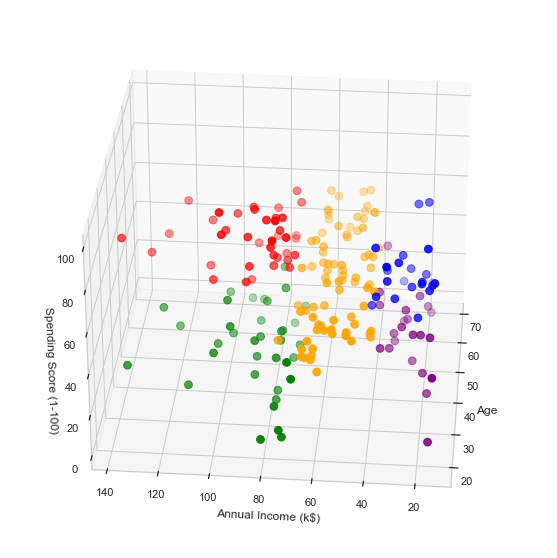

In [115]:
# I got 3 centroids since I have included Age, Annual Income and Spending score for the clustering

#Since I have 3 variables means I have 3 axis x,y,z so,I need to plot 3D graph

#For this First I am going to create scatter plot for each variabel then, going to plot that on 3D Plane

clusters = kmeans.fit_predict(X3)
df['label'] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.label == 0], df['Annual Income (k$)'][df.label == 0], df['Spending Score (1-100)'][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df['Annual Income (k$)'][df.label == 1], df['Spending Score (1-100)'][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df['Annual Income (k$)'][df.label == 2], df['Spending Score (1-100)'][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df['Annual Income (k$)'][df.label == 3], df['Spending Score (1-100)'][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df['Annual Income (k$)'][df.label == 4], df['Spending Score (1-100)'][df.label == 4], c='purple', s=60)

ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()


In [116]:
#As seen above the 3D representation of cluster based on 3 variables Age, Annual Income, and Spending Score

#Now we segmented the complete data w.r.t the provided variabled using KMeans algorithm
